In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [3]:
raw_df = pd.read_csv('/content/drive/MyDrive/Swedish Pollution Project/Swedish_pollution_buildings_dataset.csv')

In [4]:
raw_df

,Year,Nitrogen oxide (t),Non methane volatile organic compounds (NMVOC) (t),Sulphur dioxide (t),Ammonia (NH3) (t),PM2.5 (t),PM10 (t),TSP (t),Black carbon (BC) (t),Carbon monoxide (CO) (t),...,Selenium (Se) (kg),Zink (Zn) (kg),Dioxin (g I-Teq),benzo(a)pyrene (kg),benzo(b)fluoranthene (kg),benzo(k)fluoranthene (kg),"Indeno(1,2,3-cd)pyrene (kg)",PAH 1-4 (kg),HCB (kg),PCB (kg)
0,1990,13614.7,19654.4,12683.2,372.5,14350.9,15160.7,15564.8,..,153850.5,...,137.5,17724.4,3.2,4797.9,4429.3,1672.0,2796.3,13738.4,0.2,0.0
1,1991,13414.6,20242.4,12242.2,370.8,14653.0,15465.5,15839.0,..,158480.2,...,137.3,18005.9,3.2,4921.8,4552.7,1719.0,2877.7,14099.8,0.2,0.0
2,1992,11950.6,20551.6,10379.9,352.5,14793.8,15586.3,15925.9,..,160493.2,...,127.7,18001.6,3.1,4970.9,4605.5,1739.6,2914.0,14245.6,0.2,0.0
3,1993,11082.3,22025.3,6300.1,357.6,15488.4,16315.2,16655.9,..,167676.1,...,131.0,18723.8,3.3,5175.7,4801.1,1813.2,3037.0,14836.6,0.2,0.0
4,1994,10595.7,20440.4,6010.2,350.6,14443.9,15210.1,15520.3,..,158337.4,...,124.9,17740.5,3.1,4883.3,4534.2,1712.4,2867.5,14004.2,0.2,0.0
5,1995,9280.2,21361.8,5272.0,347.2,15080.0,15872.4,16189.0,..,165962.8,...,125.3,18558.4,3.2,5129.0,4762.5,1798.8,3013.0,14706.7,0.2,0.0
6,1996,9340.7,20758.5,4090.2,246.7,14625.6,15394.4,15698.4,..,161986.1,...,125.6,18829.9,3.3,5071.4,4721.5,1781.8,2977.8,14553.8,0.2,0.0
7,1997,8577.4,18621.5,3696.9,227.5,13170.2,13865.7,14145.0,..,148160.7,...,117.8,17726.3,3.1,4627.0,4316.9,1627.0,2711.4,13286.4,0.2,0.0
8,1998,8159.0,16035.0,3391.8,212.7,11227.3,11818.7,12055.0,..,136919.2,...,105.1,15885.6,2.8,4010.8,3756.7,1414.5,2349.8,11533.8,0.2,0.0
9,1999,7694.2,15747.8,3037.7,208.7,11124.6,11709.9,11943.5,..,124047.1,...,104.8,16151.8,2.8,3929.1,3690.9,1387.6,2298.3,11307.4,0.2,0.0


In [5]:
raw_df.describe()

,Year,Nitrogen oxide (t),Non methane volatile organic compounds (NMVOC) (t),Sulphur dioxide (t),Ammonia (NH3) (t),PM2.5 (t),PM10 (t),TSP (t),Carbon monoxide (CO) (t),Lead (Pb) (kg),...,Selenium (Se) (kg),Zink (Zn) (kg),Dioxin (g I-Teq),benzo(a)pyrene (kg),benzo(b)fluoranthene (kg),benzo(k)fluoranthene (kg),"Indeno(1,2,3-cd)pyrene (kg)",PAH 1-4 (kg),HCB (kg),PCB (kg)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,2006.500000,6699.002941,13671.338235,2759.702941,208.997059,9810.773529,10332.229412,10546.541176,115647.523529,831.767647,...,112.117647,18421.741176,3.252941,3360.191176,3251.958824,1206.279412,1932.035294,9753.917647,0.217647,0.0
std,9.958246,2819.312710,4614.549139,3264.966114,75.544807,3229.717449,3404.168146,3480.379483,29544.669795,138.302840,...,12.491730,1641.616902,0.296684,1117.133133,947.478212,372.079091,681.514436,3122.286844,0.038695,0.0
min,1990.000000,3708.800000,6817.100000,599.900000,130.900000,4915.800000,5177.100000,5283.900000,69686.900000,625.700000,...,90.800000,15885.600000,2.800000,1614.000000,1725.000000,615.000000,880.900000,4834.800000,0.200000,0.0
25%,1998.250000,4507.575000,9817.625000,766.300000,158.525000,7117.550000,7495.650000,7648.875000,93410.250000,753.425000,...,104.875000,17114.150000,3.025000,2389.600000,2438.050000,884.700000,1336.175000,7048.525000,0.200000,0.0
50%,2006.500000,5525.800000,12757.400000,1178.900000,182.850000,9312.700000,9805.350000,10004.000000,110157.300000,821.800000,...,111.950000,18354.500000,3.200000,3191.600000,3155.750000,1159.550000,1816.800000,9320.900000,0.200000,0.0
75%,2014.750000,8042.800000,15998.050000,3303.275000,211.775000,11206.775000,11796.775000,12032.600000,134407.225000,851.675000,...,120.225000,19468.525000,3.475000,3990.375000,3740.250000,1407.775000,2336.925000,11477.200000,0.200000,0.0
max,2023.000000,13614.700000,22025.300000,12683.200000,372.500000,15488.400000,16315.200000,16655.900000,167676.100000,1144.000000,...,137.500000,21664.000000,3.800000,5175.700000,4801.100000,1813.200000,3037.000000,14836.600000,0.300000,0.0


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Year                                                34 non-null     int64  
 1   Nitrogen oxide (t)                                  34 non-null     float64
 2   Non methane volatile organic compounds (NMVOC) (t)  34 non-null     float64
 3   Sulphur dioxide (t)                                 34 non-null     float64
 4   Ammonia (NH3) (t)                                   34 non-null     float64
 5   PM2.5 (t)                                           34 non-null     float64
 6   PM10 (t)                                            34 non-null     float64
 7   TSP (t)                                             34 non-null     float64
 8   Black carbon (BC) (t)                               34 non-null     object 
 9   C

In [7]:
raw_df.rename(columns={'Non methane volatile organic compounds (NMVOC) (t)':'NMVOC(t)',
                       'Sulphur dioxide (t)':'SO2(t)',
                       'Ammonia (NH3) (t)':'NH3(t)',
                       'Black carbon (BC) (t)':'BC(t)',
                       'Carbon monoxide (CO) (t)':'CO(t)',
                       'Lead (Pb) (kg)':'Pb(kg)',
                       'Cadmium (Cd) (kg)':'Cd(kg)',
                       'Mercury (Hg) (kg)':'Hg(kg)',
                       'Arsenic (As) (kg)':'As(kg)',
                       'Chromium  (Cr) (kg)':'Cr(kg)',
                       'Copper (Cu) (kg)':'Cu(kg)',
                       'Nickel (Ni) (kg)':'Ni(kg)',
                       'Selenium (Se) (kg)':'Se(kg)',
                       'Zink (Zn) (kg)':'Zn(kg)'},inplace=True)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         34 non-null     int64  
 1   Nitrogen oxide (t)           34 non-null     float64
 2   NMVOC(t)                     34 non-null     float64
 3   SO2(t)                       34 non-null     float64
 4   NH3(t)                       34 non-null     float64
 5   PM2.5 (t)                    34 non-null     float64
 6   PM10 (t)                     34 non-null     float64
 7   TSP (t)                      34 non-null     float64
 8   BC(t)                        34 non-null     object 
 9   CO(t)                        34 non-null     float64
 10  Pb(kg)                       34 non-null     float64
 11  Cd(kg)                       34 non-null     float64
 12  Hg(kg)                       34 non-null     float64
 13  As(kg)                

In [9]:
raw_df.loc[raw_df['BC(t)']=='..','BC(t)'] = np.nan

In [10]:
raw_df['BC(t)'] = raw_df['BC(t)'].astype(float)

In [11]:
mean_columns = raw_df.mean()

In [12]:
raw_df.fillna(mean_columns,inplace=True)

In [13]:
raw_df

,Year,Nitrogen oxide (t),NMVOC(t),SO2(t),NH3(t),PM2.5 (t),PM10 (t),TSP (t),BC(t),CO(t),...,Se(kg),Zn(kg),Dioxin (g I-Teq),benzo(a)pyrene (kg),benzo(b)fluoranthene (kg),benzo(k)fluoranthene (kg),"Indeno(1,2,3-cd)pyrene (kg)",PAH 1-4 (kg),HCB (kg),PCB (kg)
0,1990,13614.7,19654.4,12683.2,372.5,14350.9,15160.7,15564.8,975.2625,153850.5,...,137.5,17724.4,3.2,4797.9,4429.3,1672.0,2796.3,13738.4,0.2,0.0
1,1991,13414.6,20242.4,12242.2,370.8,14653.0,15465.5,15839.0,975.2625,158480.2,...,137.3,18005.9,3.2,4921.8,4552.7,1719.0,2877.7,14099.8,0.2,0.0
2,1992,11950.6,20551.6,10379.9,352.5,14793.8,15586.3,15925.9,975.2625,160493.2,...,127.7,18001.6,3.1,4970.9,4605.5,1739.6,2914.0,14245.6,0.2,0.0
3,1993,11082.3,22025.3,6300.1,357.6,15488.4,16315.2,16655.9,975.2625,167676.1,...,131.0,18723.8,3.3,5175.7,4801.1,1813.2,3037.0,14836.6,0.2,0.0
4,1994,10595.7,20440.4,6010.2,350.6,14443.9,15210.1,15520.3,975.2625,158337.4,...,124.9,17740.5,3.1,4883.3,4534.2,1712.4,2867.5,14004.2,0.2,0.0
5,1995,9280.2,21361.8,5272.0,347.2,15080.0,15872.4,16189.0,975.2625,165962.8,...,125.3,18558.4,3.2,5129.0,4762.5,1798.8,3013.0,14706.7,0.2,0.0
6,1996,9340.7,20758.5,4090.2,246.7,14625.6,15394.4,15698.4,975.2625,161986.1,...,125.6,18829.9,3.3,5071.4,4721.5,1781.8,2977.8,14553.8,0.2,0.0
7,1997,8577.4,18621.5,3696.9,227.5,13170.2,13865.7,14145.0,975.2625,148160.7,...,117.8,17726.3,3.1,4627.0,4316.9,1627.0,2711.4,13286.4,0.2,0.0
8,1998,8159.0,16035.0,3391.8,212.7,11227.3,11818.7,12055.0,975.2625,136919.2,...,105.1,15885.6,2.8,4010.8,3756.7,1414.5,2349.8,11533.8,0.2,0.0
9,1999,7694.2,15747.8,3037.7,208.7,11124.6,11709.9,11943.5,975.2625,124047.1,...,104.8,16151.8,2.8,3929.1,3690.9,1387.6,2298.3,11307.4,0.2,0.0


In [14]:
raw_df.describe()

,Year,Nitrogen oxide (t),NMVOC(t),SO2(t),NH3(t),PM2.5 (t),PM10 (t),TSP (t),BC(t),CO(t),...,Se(kg),Zn(kg),Dioxin (g I-Teq),benzo(a)pyrene (kg),benzo(b)fluoranthene (kg),benzo(k)fluoranthene (kg),"Indeno(1,2,3-cd)pyrene (kg)",PAH 1-4 (kg),HCB (kg),PCB (kg)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,2006.500000,6699.002941,13671.338235,2759.702941,208.997059,9810.773529,10332.229412,10546.541176,975.262500,115647.523529,...,112.117647,18421.741176,3.252941,3360.191176,3251.958824,1206.279412,1932.035294,9753.917647,0.217647,0.0
std,9.958246,2819.312710,4614.549139,3264.966114,75.544807,3229.717449,3404.168146,3480.379483,181.020882,29544.669795,...,12.491730,1641.616902,0.296684,1117.133133,947.478212,372.079091,681.514436,3122.286844,0.038695,0.0
min,1990.000000,3708.800000,6817.100000,599.900000,130.900000,4915.800000,5177.100000,5283.900000,623.400000,69686.900000,...,90.800000,15885.600000,2.800000,1614.000000,1725.000000,615.000000,880.900000,4834.800000,0.200000,0.0
25%,1998.250000,4507.575000,9817.625000,766.300000,158.525000,7117.550000,7495.650000,7648.875000,859.825000,93410.250000,...,104.875000,17114.150000,3.025000,2389.600000,2438.050000,884.700000,1336.175000,7048.525000,0.200000,0.0
50%,2006.500000,5525.800000,12757.400000,1178.900000,182.850000,9312.700000,9805.350000,10004.000000,975.262500,110157.300000,...,111.950000,18354.500000,3.200000,3191.600000,3155.750000,1159.550000,1816.800000,9320.900000,0.200000,0.0
75%,2014.750000,8042.800000,15998.050000,3303.275000,211.775000,11206.775000,11796.775000,12032.600000,1086.925000,134407.225000,...,120.225000,19468.525000,3.475000,3990.375000,3740.250000,1407.775000,2336.925000,11477.200000,0.200000,0.0
max,2023.000000,13614.700000,22025.300000,12683.200000,372.500000,15488.400000,16315.200000,16655.900000,1306.000000,167676.100000,...,137.500000,21664.000000,3.800000,5175.700000,4801.100000,1813.200000,3037.000000,14836.600000,0.300000,0.0


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         34 non-null     int64  
 1   Nitrogen oxide (t)           34 non-null     float64
 2   NMVOC(t)                     34 non-null     float64
 3   SO2(t)                       34 non-null     float64
 4   NH3(t)                       34 non-null     float64
 5   PM2.5 (t)                    34 non-null     float64
 6   PM10 (t)                     34 non-null     float64
 7   TSP (t)                      34 non-null     float64
 8   BC(t)                        34 non-null     float64
 9   CO(t)                        34 non-null     float64
 10  Pb(kg)                       34 non-null     float64
 11  Cd(kg)                       34 non-null     float64
 12  Hg(kg)                       34 non-null     float64
 13  As(kg)                

<Axes: title={'center': 'Air Pollution in Unit (t) 1/3'}, xlabel='Year'>

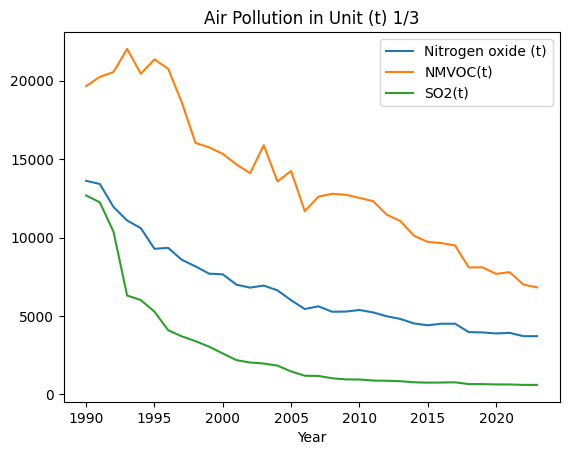

In [16]:
raw_df.plot(x='Year',y=['Nitrogen oxide (t)',
                        'NMVOC(t)',
                        'SO2(t)'],kind='line',title='Air Pollution in Unit (t) 1/3')

<Axes: title={'center': 'Air Pollution in Unit (t) 2/3'}, xlabel='Year'>

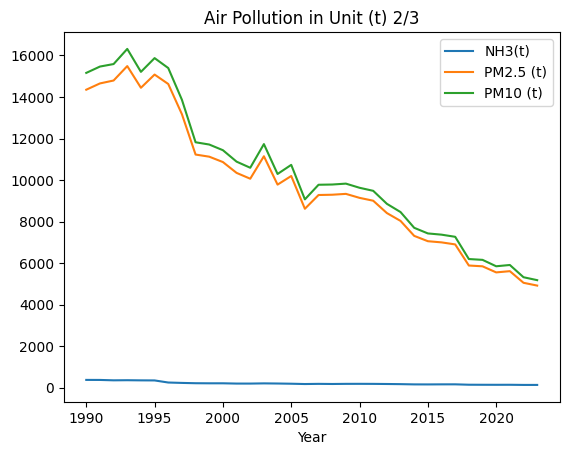

In [17]:
raw_df.plot(x='Year',y=['NH3(t)',
                        'PM2.5 (t)',
                        'PM10 (t)'],kind='line',title='Air Pollution in Unit (t) 2/3')

<Axes: title={'center': 'Air Pollution in Unit (t) 3/3'}, xlabel='Year'>

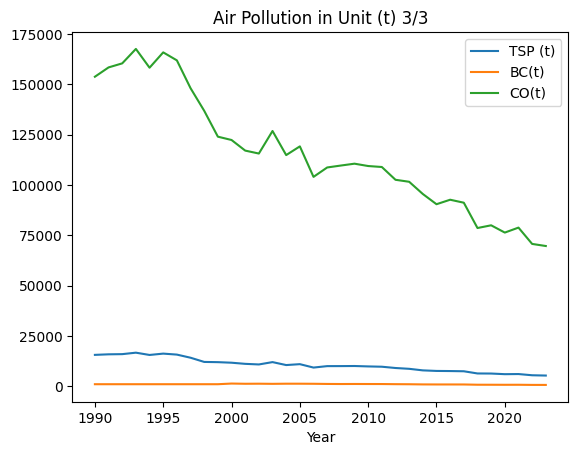

In [18]:
raw_df.plot(x='Year',y=['TSP (t)',
                        'BC(t)',
                        'CO(t)'],kind='line',title='Air Pollution in Unit (t) 3/3')

<Axes: title={'center': 'Air Pollution in Unit (kg) 1/4'}, xlabel='Year'>

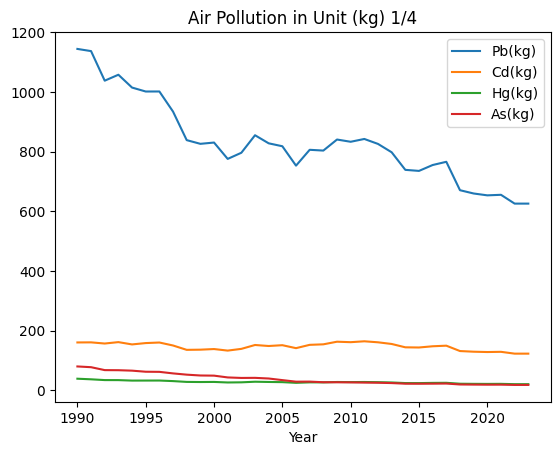

In [19]:
raw_df.plot(x='Year',y=['Pb(kg)',
                        'Cd(kg)',
                        'Hg(kg)',
                        'As(kg)'],kind='line',title='Air Pollution in Unit (kg) 1/4')

<Axes: title={'center': 'Air Pollution in Unit (kg) 2/4'}, xlabel='Year'>

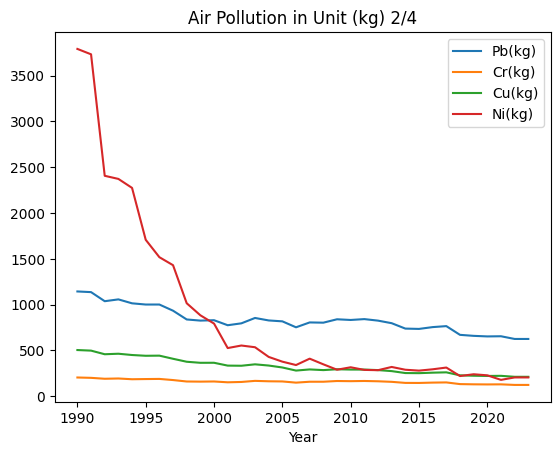

In [20]:
raw_df.plot(x='Year',y=['Pb(kg)',
                        'Cr(kg)',
                        'Cu(kg)',
                        'Ni(kg)'],kind='line',title='Air Pollution in Unit (kg) 2/4')

<Axes: title={'center': 'Air Pollution in Unit (kg) 3/4'}, xlabel='Year'>

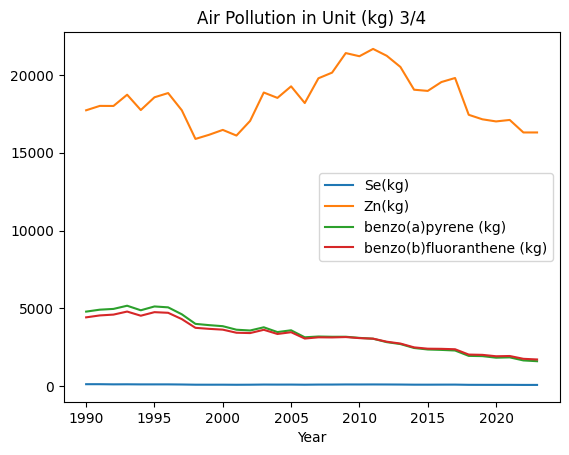

In [21]:
raw_df.plot(x='Year',y=['Se(kg)',
                        'Zn(kg)',
                        'benzo(a)pyrene (kg)',
                        'benzo(b)fluoranthene (kg)'],kind='line',title='Air Pollution in Unit (kg) 3/4')

<Axes: title={'center': 'Air Pollution in Unit (kg) 4/4'}, xlabel='Year'>

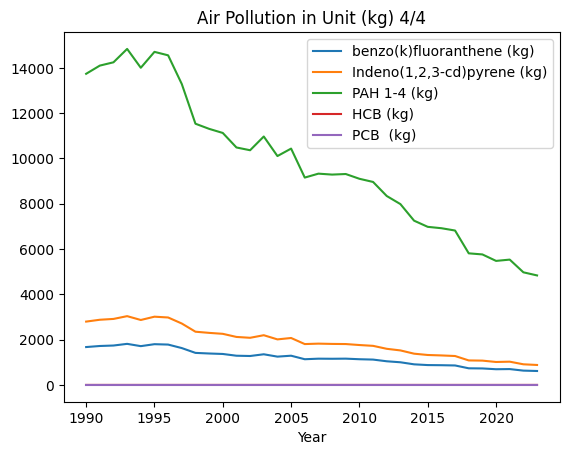

In [22]:
raw_df.plot(x='Year',y=['benzo(k)fluoranthene (kg)',
                        'Indeno(1,2,3-cd)pyrene (kg)',
                        'PAH 1-4 (kg)',
                        'HCB (kg)',
                        'PCB  (kg)'],kind='line',title='Air Pollution in Unit (kg) 4/4')

<Axes: title={'center': 'Air Pollution in Unit (g I-Teq)'}, xlabel='Year'>

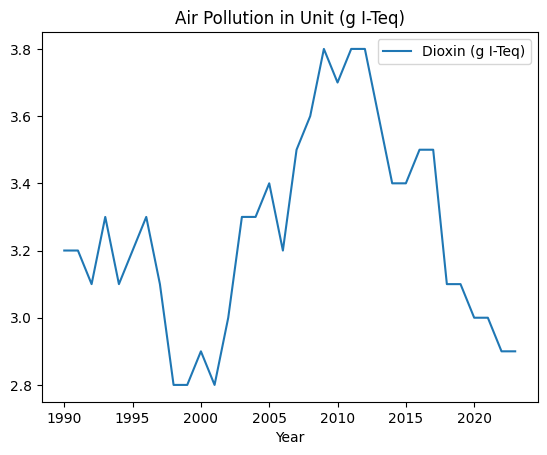

In [23]:
raw_df.plot(x='Year',y=['Dioxin (g I-Teq)'],kind='line',title='Air Pollution in Unit (g I-Teq)')

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         34 non-null     int64  
 1   Nitrogen oxide (t)           34 non-null     float64
 2   NMVOC(t)                     34 non-null     float64
 3   SO2(t)                       34 non-null     float64
 4   NH3(t)                       34 non-null     float64
 5   PM2.5 (t)                    34 non-null     float64
 6   PM10 (t)                     34 non-null     float64
 7   TSP (t)                      34 non-null     float64
 8   BC(t)                        34 non-null     float64
 9   CO(t)                        34 non-null     float64
 10  Pb(kg)                       34 non-null     float64
 11  Cd(kg)                       34 non-null     float64
 12  Hg(kg)                       34 non-null     float64
 13  As(kg)                

<Axes: >

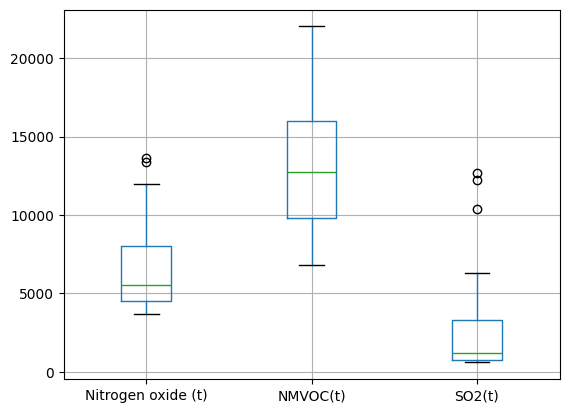

In [25]:
raw_df.boxplot(column=['Nitrogen oxide (t)','NMVOC(t)','SO2(t)'])

<Axes: >

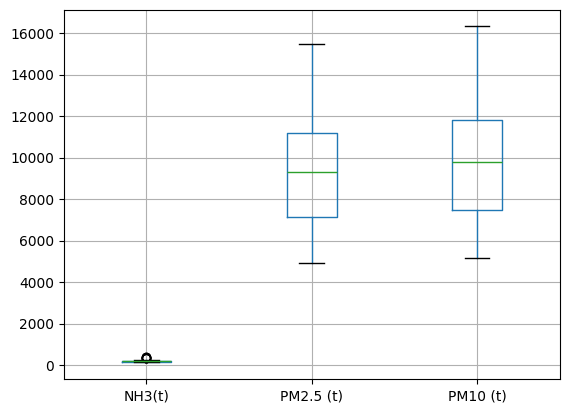

In [26]:
raw_df.boxplot(column=['NH3(t)','PM2.5 (t)','PM10 (t)'])

<Axes: >

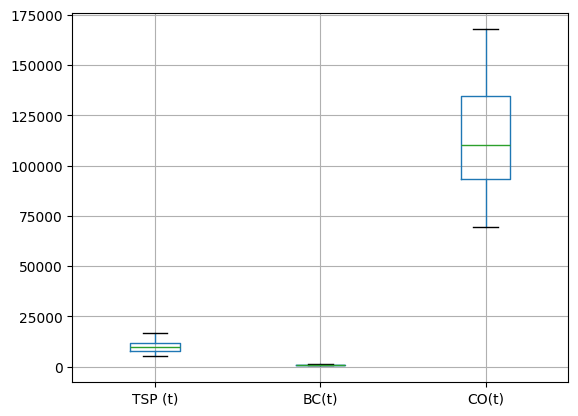

In [27]:
raw_df.boxplot(column=['TSP (t)','BC(t)','CO(t)'])

<Axes: >

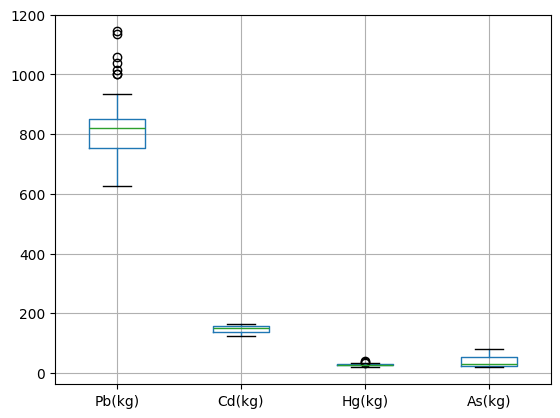

In [28]:
raw_df.boxplot(column=['Pb(kg)','Cd(kg)','Hg(kg)','As(kg)'])

<Axes: >

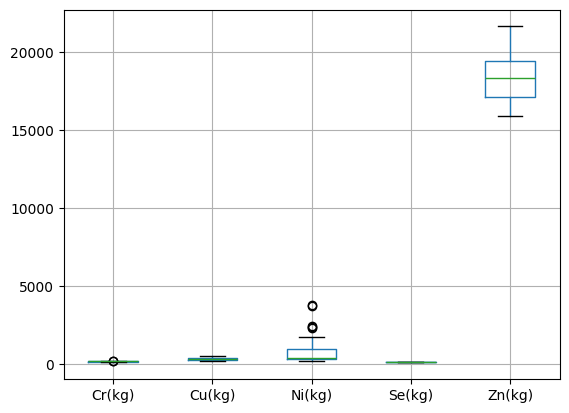

In [29]:
raw_df.boxplot(column=['Cr(kg)','Cu(kg)','Ni(kg)','Se(kg)','Zn(kg)'])

<Axes: >

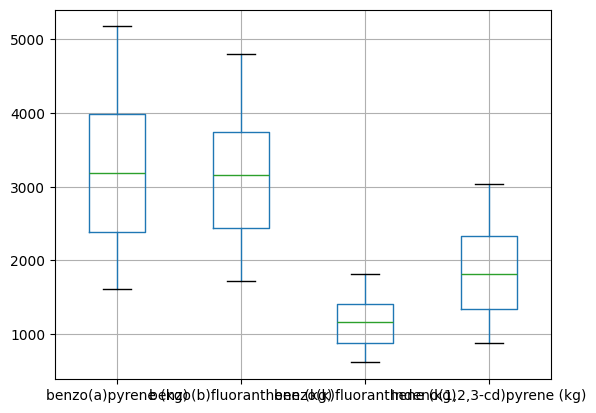

In [30]:
raw_df.boxplot(column=['benzo(a)pyrene (kg)','benzo(b)fluoranthene (kg)','benzo(k)fluoranthene (kg)','Indeno(1,2,3-cd)pyrene (kg)'])

<Axes: >

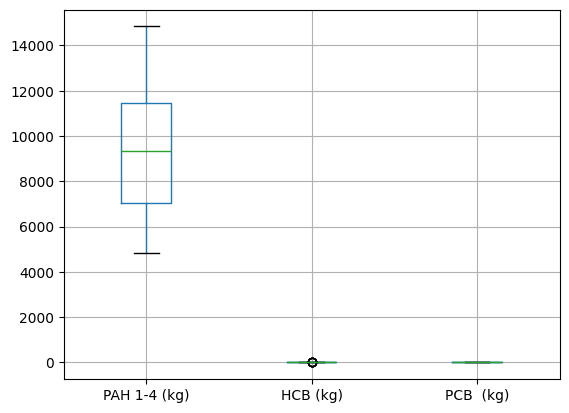

In [31]:
raw_df.boxplot(column=['PAH 1-4 (kg)','HCB (kg)','PCB  (kg)'])

<Axes: >

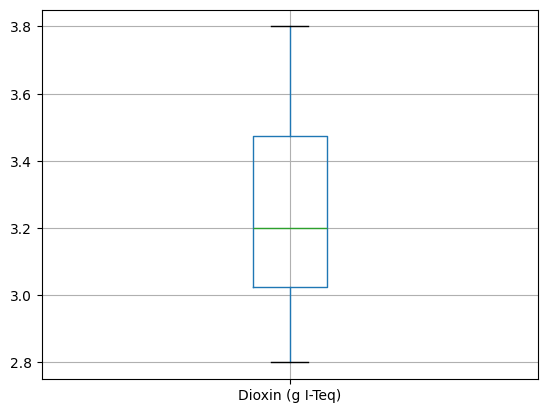

In [32]:
raw_df.boxplot(column=['Dioxin (g I-Teq)'])

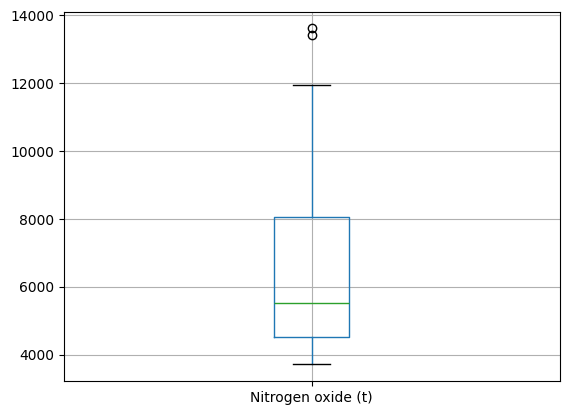

In [33]:
b_plot1 = raw_df.boxplot(column = ['Nitrogen oxide (t)'])

In [34]:
#Nitrogen oxide (t)
NOQ_1 = raw_df['Nitrogen oxide (t)'].quantile(0.25)
NOQ_3 = raw_df['Nitrogen oxide (t)'].quantile(0.75)
IQR_1 = NOQ_3 - NOQ_1
Lower_limit_1 = NOQ_1 - 1.5 * IQR_1
Upper_limit_1 = NOQ_3 + 1.5 * IQR_1
raw_df['Nitrogen oxide (t)']=np.where(raw_df['Nitrogen oxide (t)']>Upper_limit_1,Upper_limit_1,np.where(raw_df['Nitrogen oxide (t)']<Lower_limit_1,Lower_limit_1,raw_df['Nitrogen oxide (t)']))

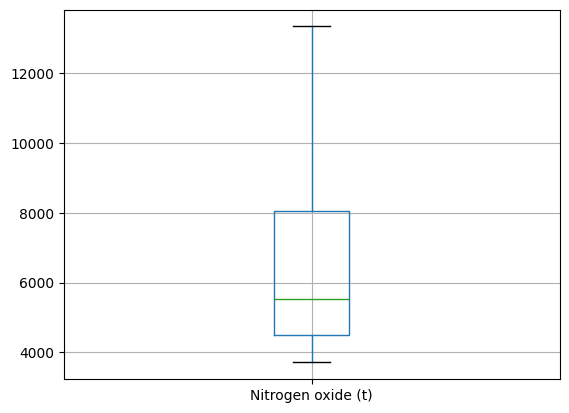

In [35]:
b_plot1 = raw_df.boxplot(column = ['Nitrogen oxide (t)'])

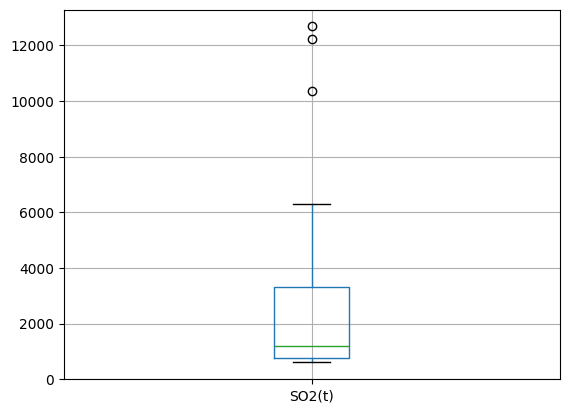

In [36]:
b_plot2 = raw_df.boxplot(column = ['SO2(t)'])

In [37]:
#SO2(t)
SOQ_1 = raw_df['SO2(t)'].quantile(0.25)
SOQ_3 = raw_df['SO2(t)'].quantile(0.75)
IQR_2 = SOQ_3 - SOQ_1
Lower_limit_2 = SOQ_1 - 1.5 * IQR_2
Upper_limit_2 = SOQ_3 + 1.5 * IQR_2
raw_df['SO2(t)']=np.where(raw_df['SO2(t)']>Upper_limit_2,Upper_limit_2,np.where(raw_df['SO2(t)']<Lower_limit_2,Lower_limit_2,raw_df['SO2(t)']))

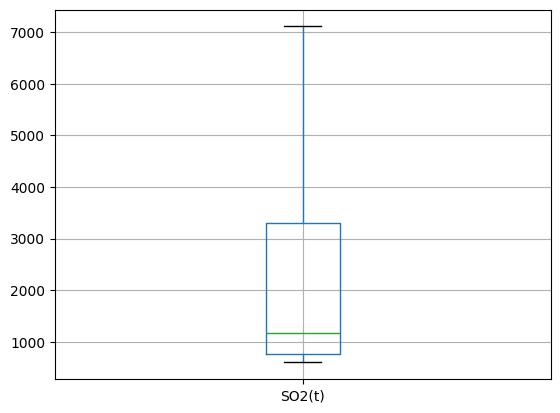

In [38]:
b_plot2 = raw_df.boxplot(column = ['SO2(t)'])

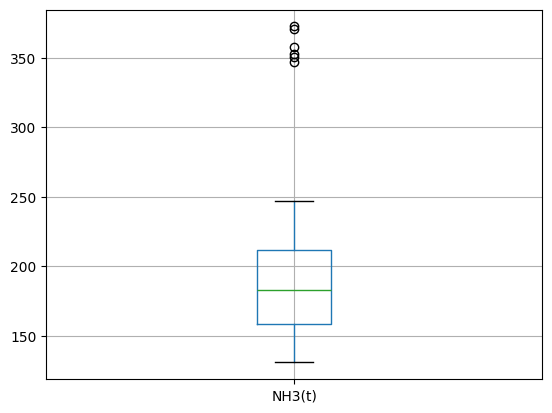

In [39]:
b_plot3 = raw_df.boxplot(column = ['NH3(t)'])

In [40]:
#NH3(t)
NH3Q_1 = raw_df['NH3(t)'].quantile(0.25)
NH3Q_3 = raw_df['NH3(t)'].quantile(0.75)
IQR_3 = NH3Q_3 - NH3Q_1
Lower_limit_3 = NH3Q_1 - 1.5 * IQR_3
Upper_limit_3 = NH3Q_3 + 1.5 * IQR_3
raw_df['NH3(t)']=np.where(raw_df['NH3(t)']>Upper_limit_3,Upper_limit_3,np.where(raw_df['NH3(t)']<Lower_limit_3,Lower_limit_3,raw_df['NH3(t)']))

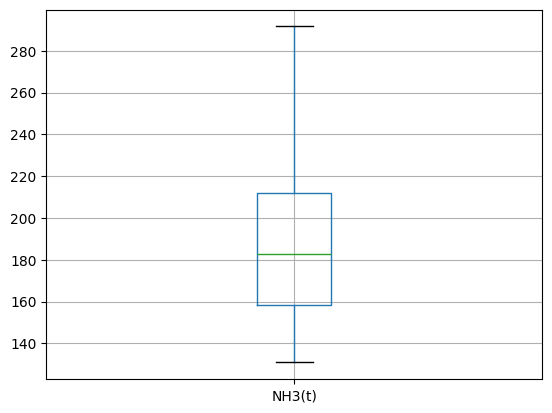

In [41]:
b_plot3 = raw_df.boxplot(column = ['NH3(t)'])

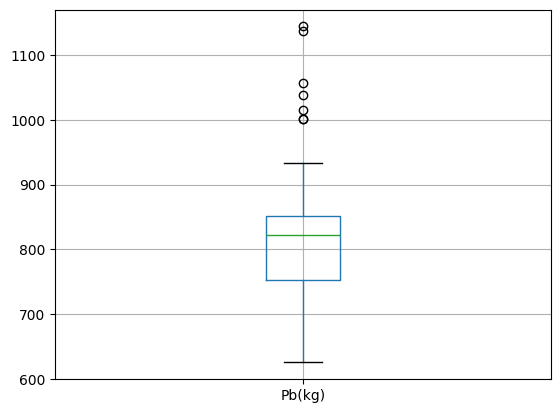

In [42]:
b_plot4 = raw_df.boxplot(column = ['Pb(kg)'])

In [43]:
#Pb(kg)
PbQ_1 = raw_df['Pb(kg)'].quantile(0.25)
PbQ_3 = raw_df['Pb(kg)'].quantile(0.75)
IQR_4 = PbQ_3 - PbQ_1
Lower_limit_4 = PbQ_1 - 1.5 * IQR_4
Upper_limit_4 = PbQ_3 + 1.5 * IQR_4
raw_df['Pb(kg)']=np.where(raw_df['Pb(kg)']>Upper_limit_4,Upper_limit_4,np.where(raw_df['Pb(kg)']<Lower_limit_4,Lower_limit_4,raw_df['Pb(kg)']))

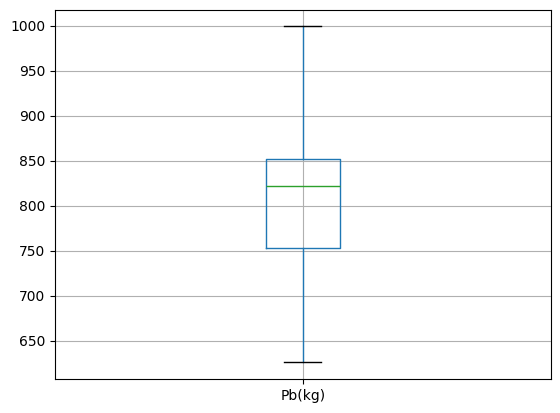

In [44]:
b_plot4 = raw_df.boxplot(column = ['Pb(kg)'])

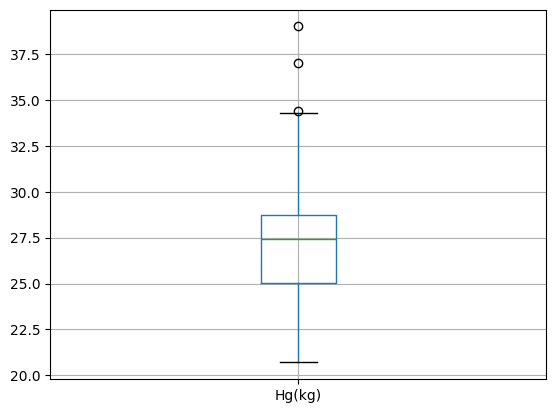

In [45]:
b_plot5 = raw_df.boxplot(column = ['Hg(kg)'])

In [46]:
#Hg(kg)
HgQ_1 = raw_df['Hg(kg)'].quantile(0.25)
HgQ_3 = raw_df['Hg(kg)'].quantile(0.75)
IQR_5 = HgQ_3 - HgQ_1
Lower_limit_5 = HgQ_1 - 1.5 * IQR_5
Upper_limit_5 = HgQ_3 + 1.5 * IQR_5
raw_df['Hg(kg)']=np.where(raw_df['Hg(kg)']>Upper_limit_5,Upper_limit_5,np.where(raw_df['Hg(kg)']<Lower_limit_5,Lower_limit_5,raw_df['Hg(kg)']))

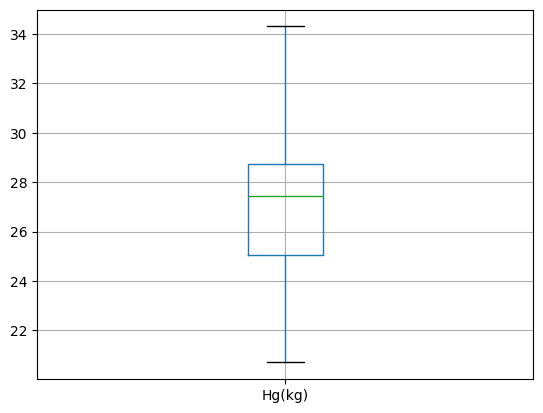

In [47]:
b_plot5 = raw_df.boxplot(column = ['Hg(kg)'])

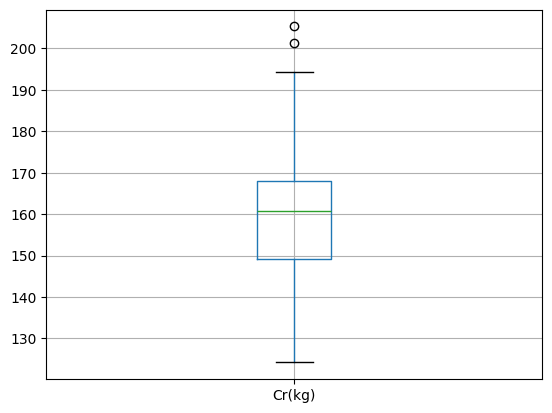

In [48]:
b_plot6 = raw_df.boxplot(column = ['Cr(kg)'])

In [49]:
#Cr(kg)
CrQ_1 = raw_df['Cr(kg)'].quantile(0.25)
CrQ_3 = raw_df['Cr(kg)'].quantile(0.75)
IQR_6 = CrQ_3 - CrQ_1
Lower_limit_6 = CrQ_1 - 1.5 * IQR_6
Upper_limit_6 = CrQ_3 + 1.5 * IQR_6
raw_df['Cr(kg)']=np.where(raw_df['Cr(kg)']>Upper_limit_6,Upper_limit_6,np.where(raw_df['Cr(kg)']<Lower_limit_6,Lower_limit_6,raw_df['Cr(kg)']))

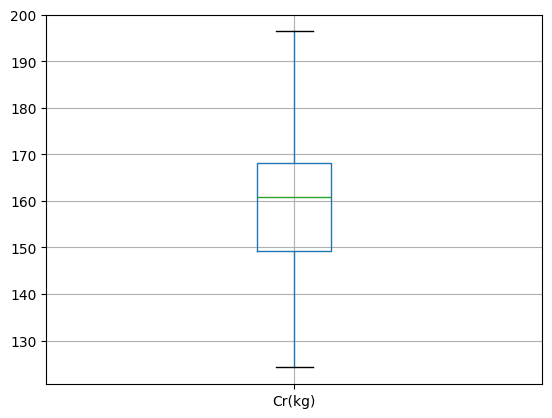

In [50]:
b_plot6 = raw_df.boxplot(column = ['Cr(kg)'])

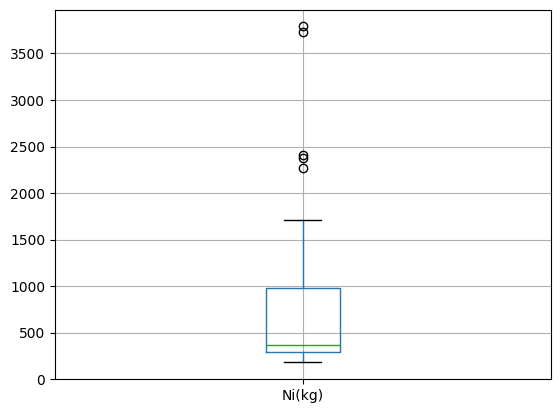

In [51]:
b_plot7 = raw_df.boxplot(column = ['Ni(kg)'])

In [52]:
#Ni(kg)
NiQ_1 = raw_df['Ni(kg)'].quantile(0.25)
NiQ_3 = raw_df['Ni(kg)'].quantile(0.75)
IQR_7 = NiQ_3 - NiQ_1
Lower_limit_7 = NiQ_1 - 1.5 * IQR_7
Upper_limit_7 = NiQ_3 + 1.5 * IQR_7
raw_df['Ni(kg)']=np.where(raw_df['Ni(kg)']>Upper_limit_7,Upper_limit_7,np.where(raw_df['Ni(kg)']<Lower_limit_7,Lower_limit_7,raw_df['Ni(kg)']))

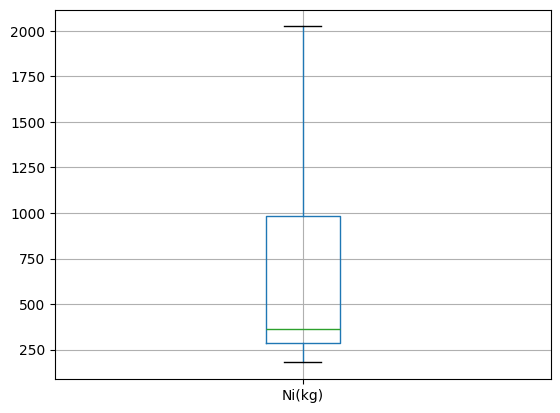

In [53]:
b_plot7 = raw_df.boxplot(column = ['Ni(kg)'])

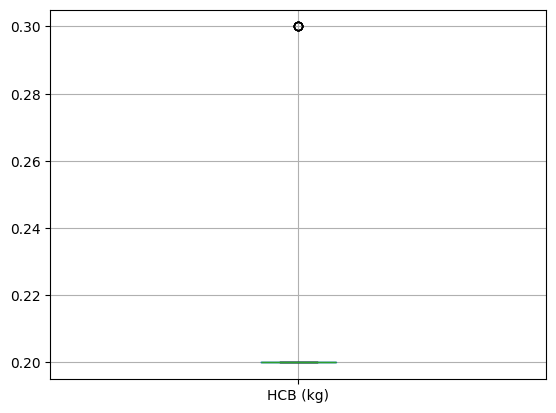

In [54]:
b_plot8 = raw_df.boxplot(column = ['HCB (kg)'])

In [55]:
#HCB (kg)
HCBQ_1 = raw_df['HCB (kg)'].quantile(0.25)
HCBQ_3 = raw_df['HCB (kg)'].quantile(0.75)
IQR_8 = HCBQ_3 - HCBQ_1
Lower_limit_8 = HCBQ_1 - 1.5 * IQR_8
Upper_limit_8 = HCBQ_3 + 1.5 * IQR_8
raw_df['HCB (kg)']=np.where(raw_df['HCB (kg)']>Upper_limit_8,Upper_limit_8,np.where(raw_df['HCB (kg)']<Lower_limit_8,Lower_limit_8,raw_df['HCB (kg)']))

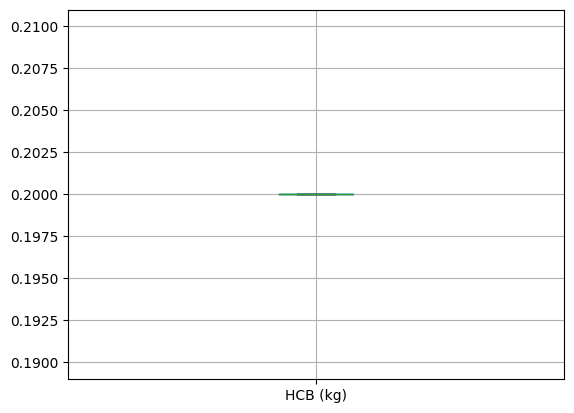

In [56]:
b_plot8 = raw_df.boxplot(column = ['HCB (kg)'])

In [57]:
#scatter plot

In [58]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         34 non-null     int64  
 1   Nitrogen oxide (t)           34 non-null     float64
 2   NMVOC(t)                     34 non-null     float64
 3   SO2(t)                       34 non-null     float64
 4   NH3(t)                       34 non-null     float64
 5   PM2.5 (t)                    34 non-null     float64
 6   PM10 (t)                     34 non-null     float64
 7   TSP (t)                      34 non-null     float64
 8   BC(t)                        34 non-null     float64
 9   CO(t)                        34 non-null     float64
 10  Pb(kg)                       34 non-null     float64
 11  Cd(kg)                       34 non-null     float64
 12  Hg(kg)                       34 non-null     float64
 13  As(kg)                

<Axes: xlabel='Nitrogen oxide (t)', ylabel='PM2.5 (t)'>

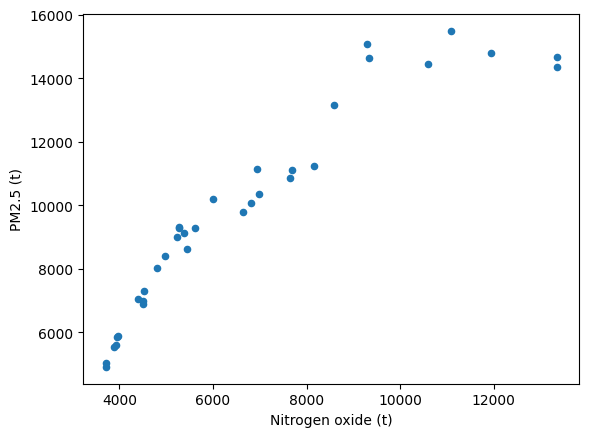

In [59]:
raw_df.plot.scatter(x='Nitrogen oxide (t)',y='PM2.5 (t)')

<Axes: xlabel='NMVOC(t)', ylabel='PM2.5 (t)'>

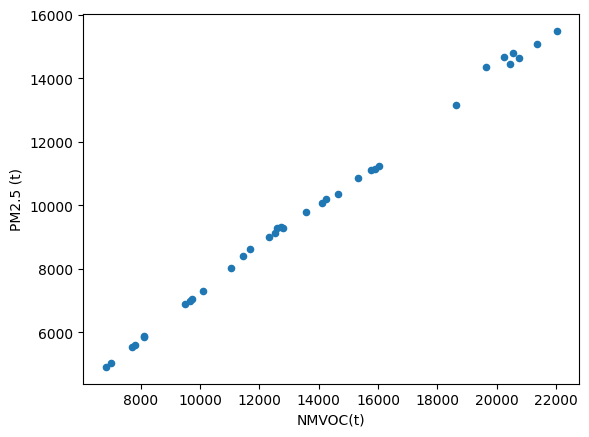

In [60]:
raw_df.plot.scatter(x='NMVOC(t)',y='PM2.5 (t)')

<Axes: xlabel='SO2(t)', ylabel='PM2.5 (t)'>

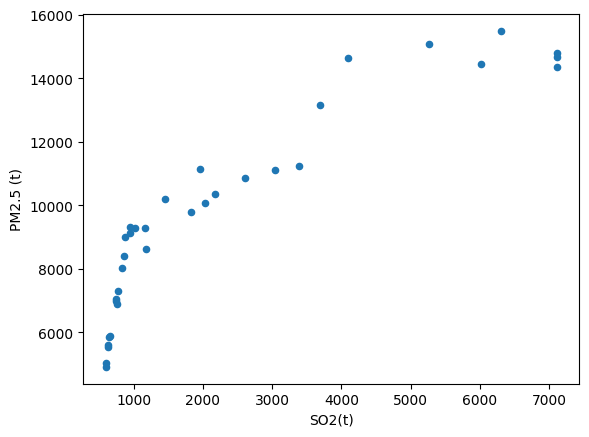

In [61]:
raw_df.plot.scatter(x='SO2(t)',y='PM2.5 (t)')

<Axes: xlabel='NH3(t)', ylabel='PM2.5 (t)'>

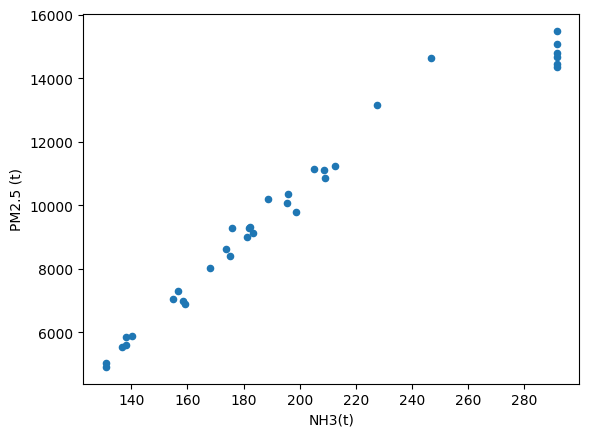

In [62]:
raw_df.plot.scatter(x='NH3(t)',y='PM2.5 (t)')

<Axes: xlabel='PM10 (t)', ylabel='PM2.5 (t)'>

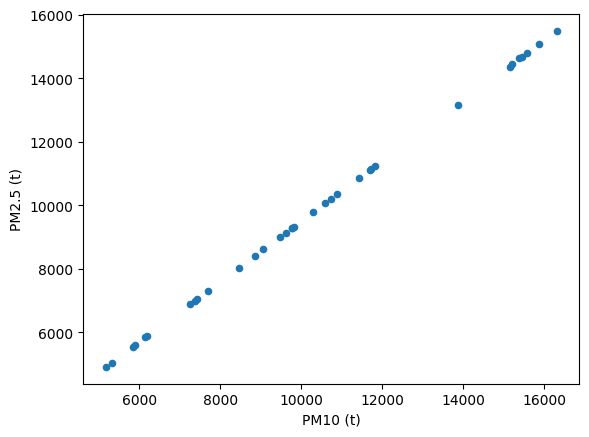

In [63]:
raw_df.plot.scatter(x='PM10 (t)',y='PM2.5 (t)')

<Axes: xlabel='TSP (t)', ylabel='PM2.5 (t)'>

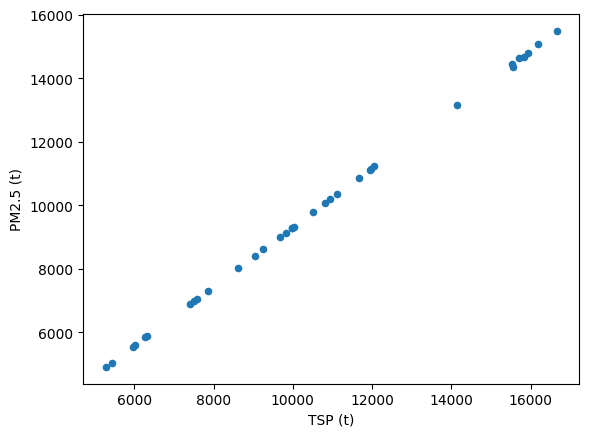

In [64]:
raw_df.plot.scatter(x='TSP (t)',y='PM2.5 (t)')

<Axes: xlabel='BC(t)', ylabel='PM2.5 (t)'>

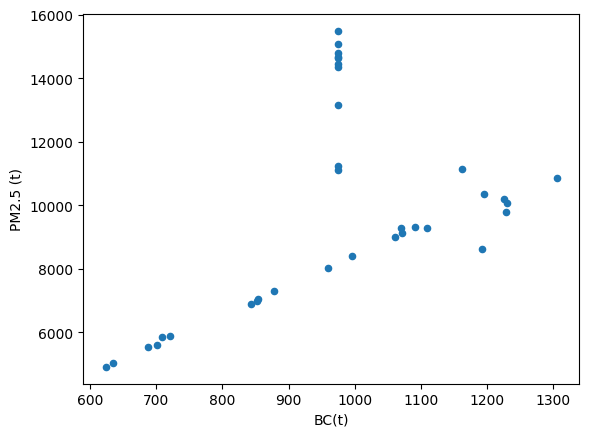

In [65]:
raw_df.plot.scatter(x='BC(t)',y='PM2.5 (t)')

<Axes: xlabel='CO(t)', ylabel='PM2.5 (t)'>

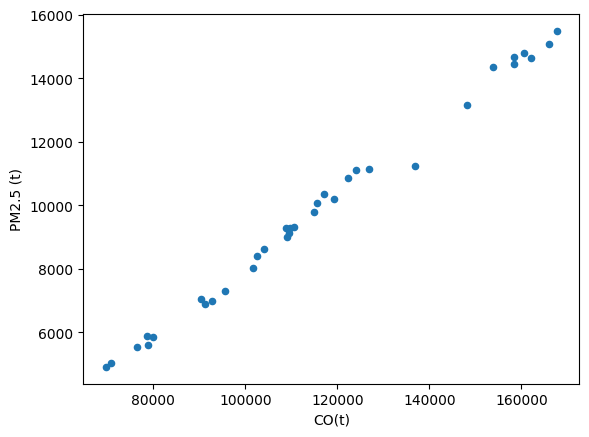

In [66]:
raw_df.plot.scatter(x='CO(t)',y='PM2.5 (t)')

<Axes: xlabel='Pb(kg)', ylabel='PM2.5 (t)'>

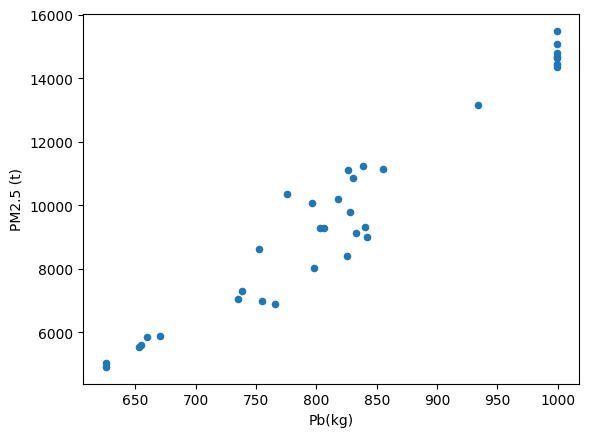

In [67]:
raw_df.plot.scatter(x='Pb(kg)',y='PM2.5 (t)')

<Axes: xlabel='Cd(kg)', ylabel='PM2.5 (t)'>

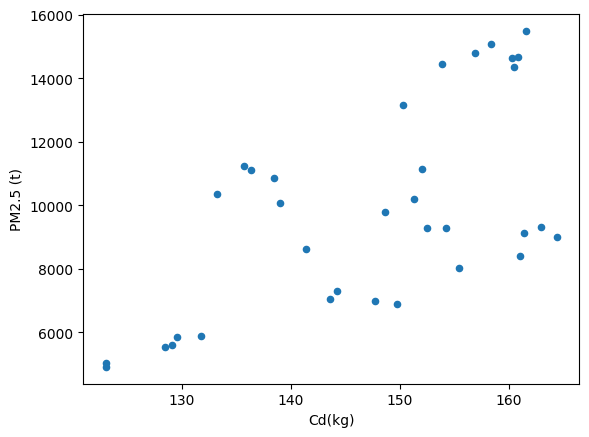

In [68]:
raw_df.plot.scatter(x='Cd(kg)',y='PM2.5 (t)')

<Axes: xlabel='Hg(kg)', ylabel='PM2.5 (t)'>

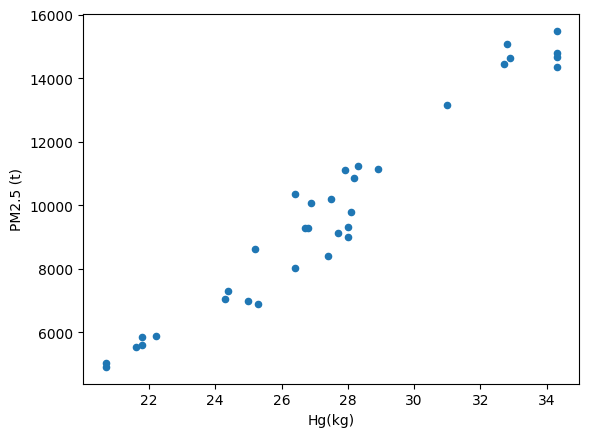

In [69]:
raw_df.plot.scatter(x='Hg(kg)',y='PM2.5 (t)')

<Axes: xlabel='As(kg)', ylabel='PM2.5 (t)'>

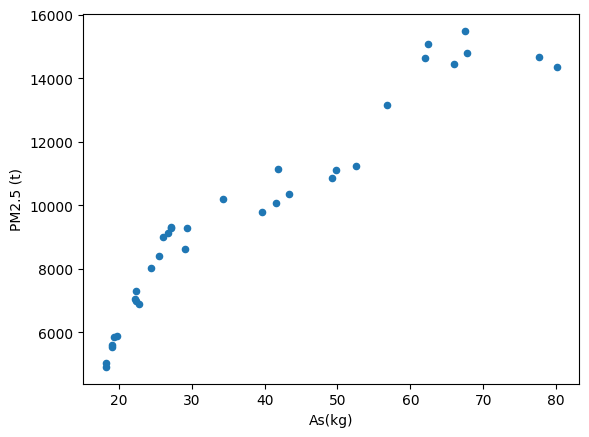

In [70]:
raw_df.plot.scatter(x='As(kg)',y='PM2.5 (t)')

<Axes: xlabel='Cr(kg)', ylabel='PM2.5 (t)'>

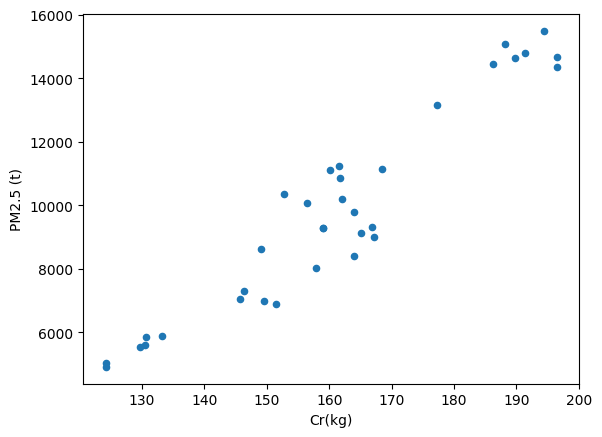

In [71]:
raw_df.plot.scatter(x='Cr(kg)',y='PM2.5 (t)')

<Axes: xlabel='Cu(kg)', ylabel='PM2.5 (t)'>

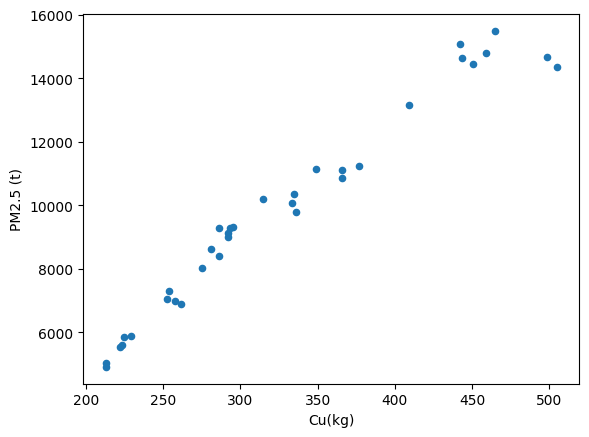

In [72]:
raw_df.plot.scatter(x='Cu(kg)',y='PM2.5 (t)')

<Axes: xlabel='Ni(kg)', ylabel='PM2.5 (t)'>

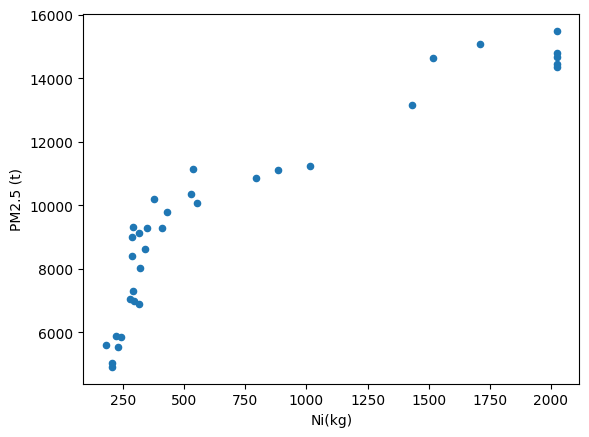

In [73]:
raw_df.plot.scatter(x='Ni(kg)',y='PM2.5 (t)')

<Axes: xlabel='Se(kg)', ylabel='PM2.5 (t)'>

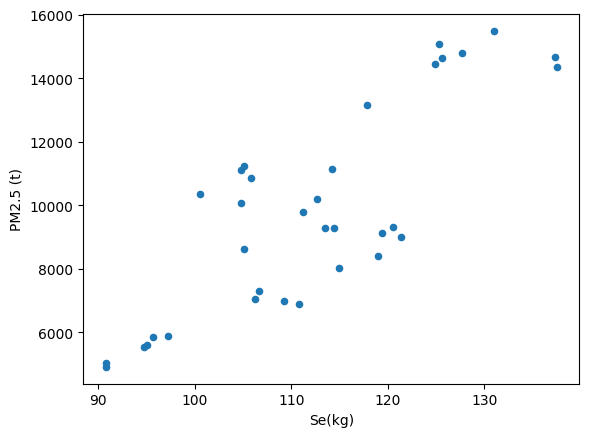

In [74]:
raw_df.plot.scatter(x='Se(kg)',y='PM2.5 (t)')

<Axes: xlabel='Zn(kg)', ylabel='PM2.5 (t)'>

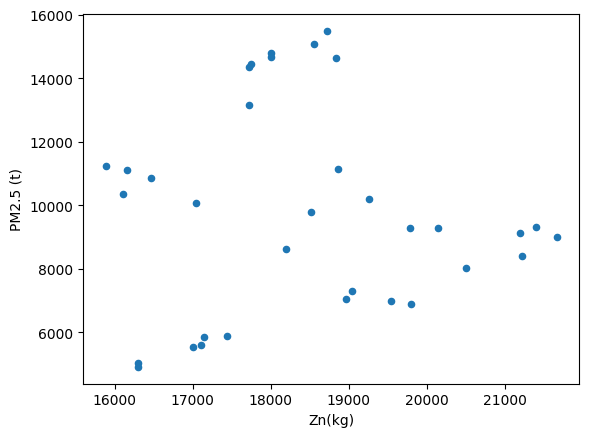

In [75]:
raw_df.plot.scatter(x='Zn(kg)',y='PM2.5 (t)')

<Axes: xlabel='Dioxin (g I-Teq)', ylabel='PM2.5 (t)'>

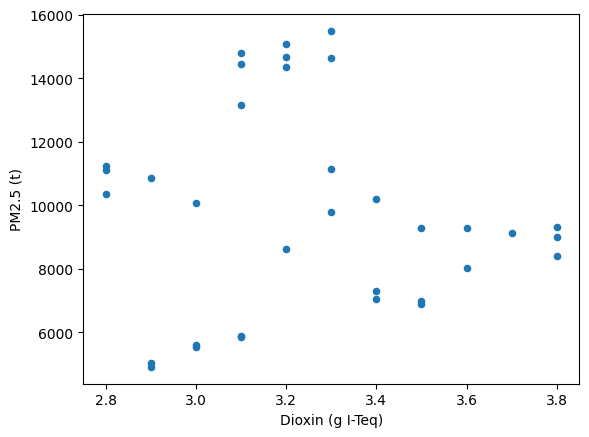

In [76]:
raw_df.plot.scatter(x='Dioxin (g I-Teq)',y='PM2.5 (t)')

<Axes: xlabel='benzo(a)pyrene (kg)', ylabel='PM2.5 (t)'>

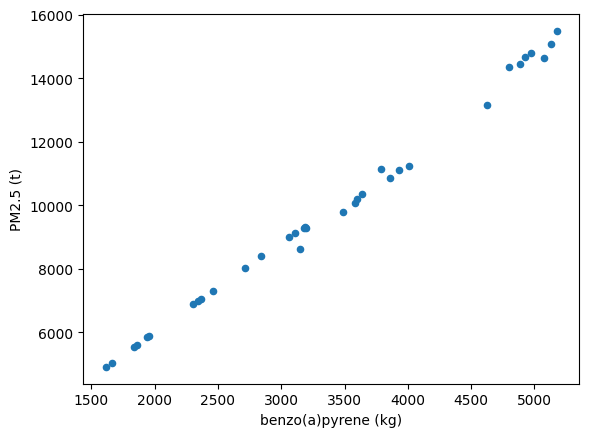

In [77]:
raw_df.plot.scatter(x='benzo(a)pyrene (kg)',y='PM2.5 (t)')

<Axes: xlabel='benzo(b)fluoranthene (kg)', ylabel='PM2.5 (t)'>

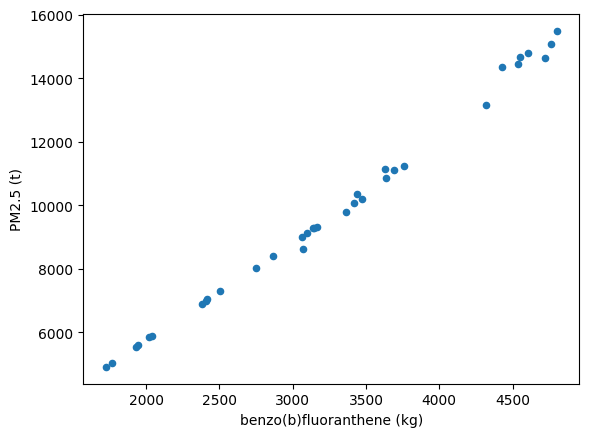

In [78]:
raw_df.plot.scatter(x='benzo(b)fluoranthene (kg)',y='PM2.5 (t)')

<Axes: xlabel='benzo(k)fluoranthene (kg)', ylabel='PM2.5 (t)'>

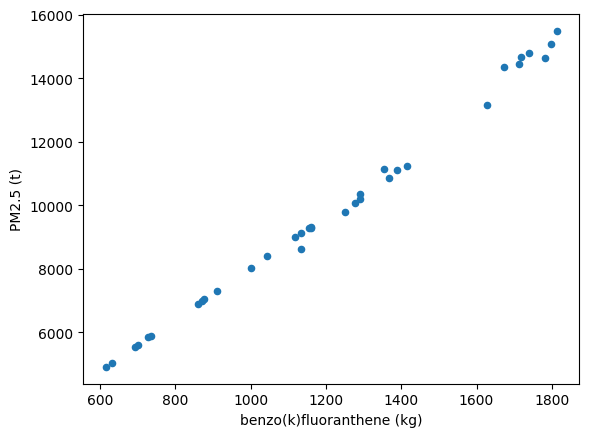

In [79]:
raw_df.plot.scatter(x='benzo(k)fluoranthene (kg)',y='PM2.5 (t)')

<Axes: xlabel='Indeno(1,2,3-cd)pyrene (kg)', ylabel='PM2.5 (t)'>

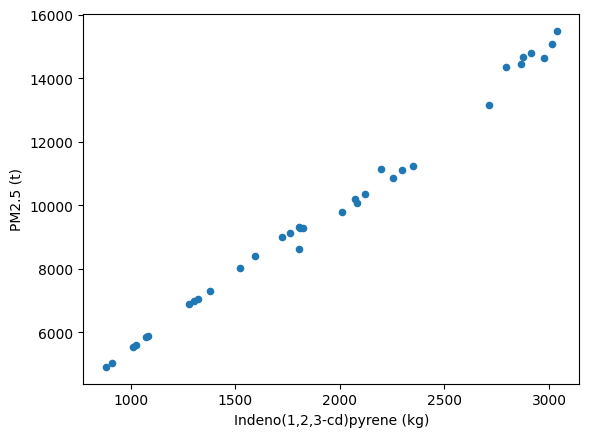

In [80]:
raw_df.plot.scatter(x='Indeno(1,2,3-cd)pyrene (kg)',y='PM2.5 (t)')

<Axes: xlabel='PAH 1-4 (kg)', ylabel='PM2.5 (t)'>

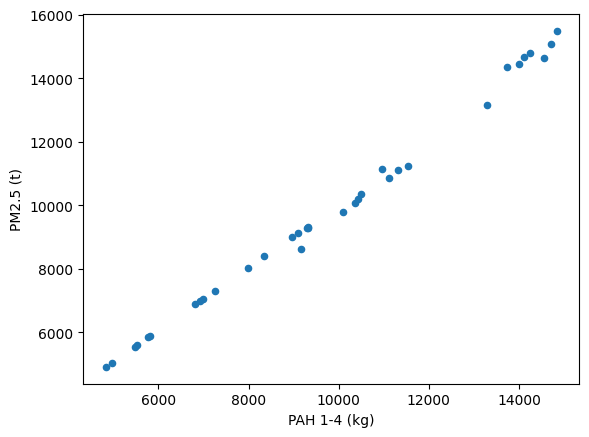

In [81]:
raw_df.plot.scatter(x='PAH 1-4 (kg)',y='PM2.5 (t)')

<Axes: xlabel='HCB (kg)', ylabel='PM2.5 (t)'>

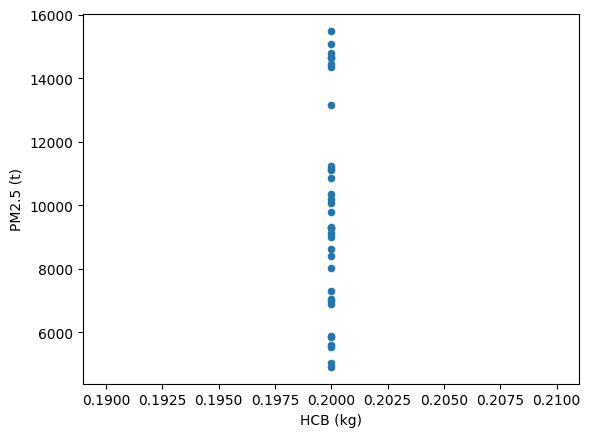

In [82]:
raw_df.plot.scatter(x='HCB (kg)',y='PM2.5 (t)')

<Axes: xlabel='PCB  (kg)', ylabel='PM2.5 (t)'>

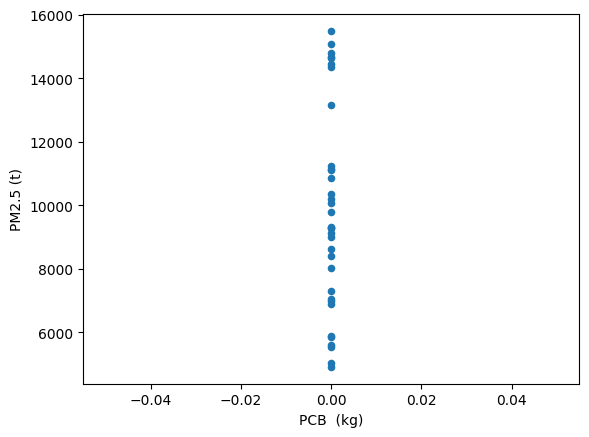

In [83]:
raw_df.plot.scatter(x='PCB  (kg)',y='PM2.5 (t)')

In [84]:
main_data = raw_df

<Axes: >

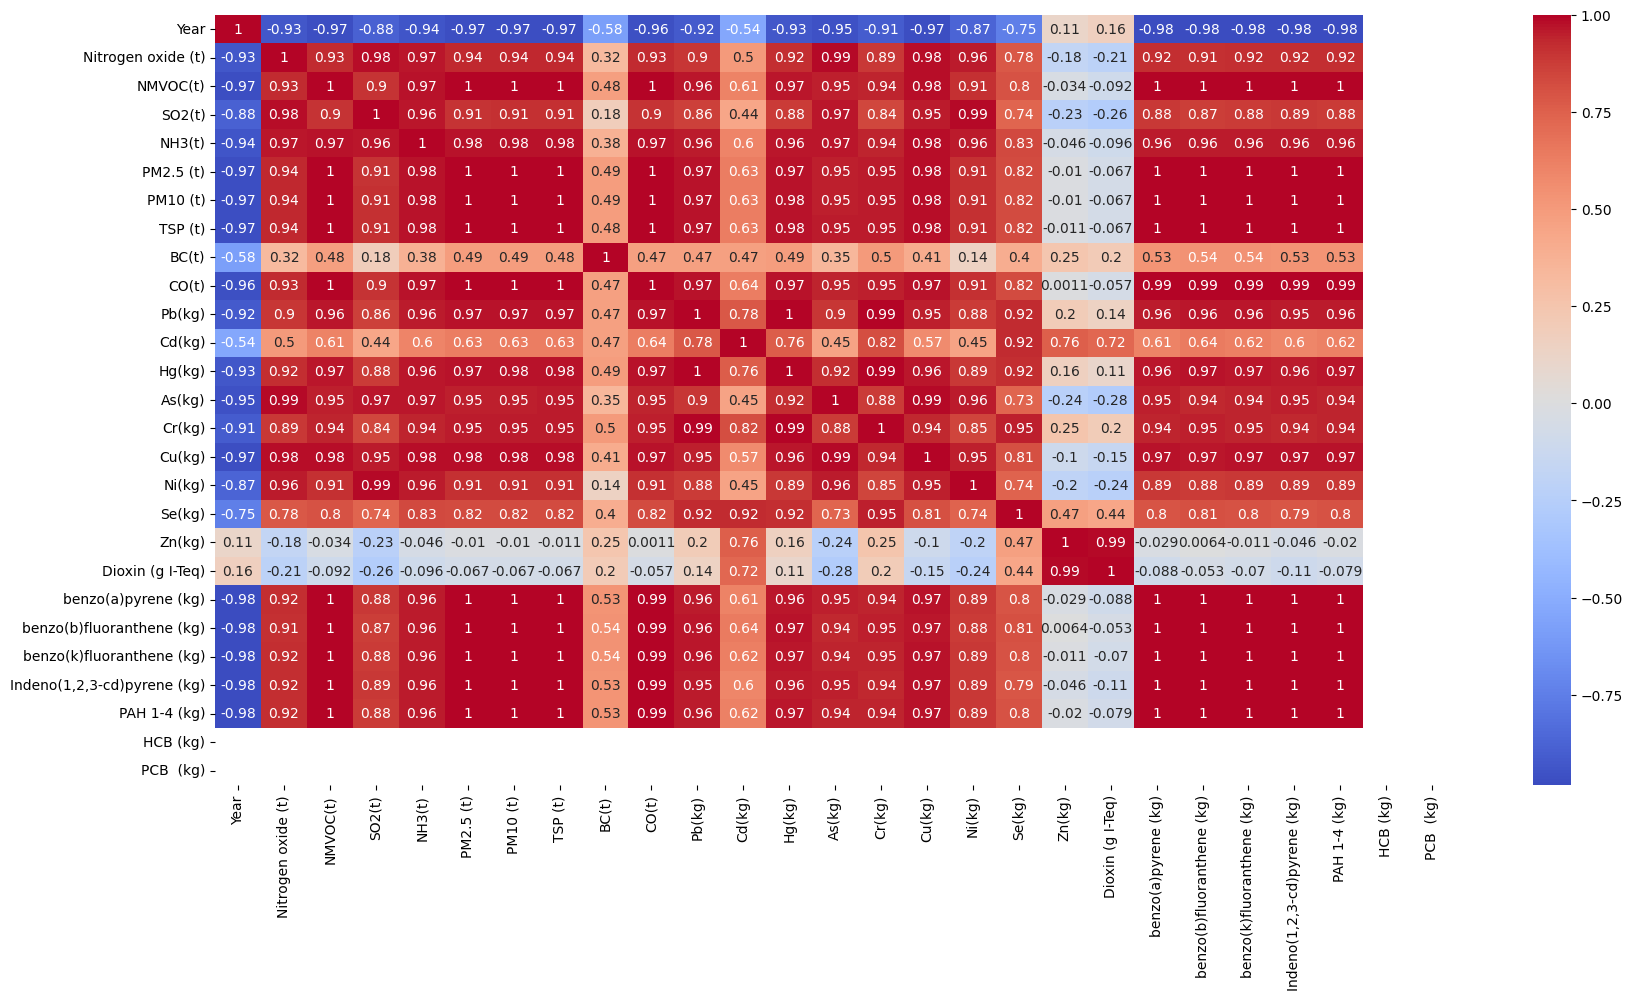

In [85]:
cor = main_data.corr()
plt.figure(figsize =(20,10))
sb.heatmap(cor , annot = True, cmap = 'coolwarm')

In [86]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         34 non-null     int64  
 1   Nitrogen oxide (t)           34 non-null     float64
 2   NMVOC(t)                     34 non-null     float64
 3   SO2(t)                       34 non-null     float64
 4   NH3(t)                       34 non-null     float64
 5   PM2.5 (t)                    34 non-null     float64
 6   PM10 (t)                     34 non-null     float64
 7   TSP (t)                      34 non-null     float64
 8   BC(t)                        34 non-null     float64
 9   CO(t)                        34 non-null     float64
 10  Pb(kg)                       34 non-null     float64
 11  Cd(kg)                       34 non-null     float64
 12  Hg(kg)                       34 non-null     float64
 13  As(kg)                

In [87]:
x = main_data[["Nitrogen oxide (t)",
               "NMVOC(t)",
               "SO2(t)",
               "NH3(t)",
               "PM10 (t)",
               "TSP (t)",
               "BC(t)",
               "CO(t)",
               "Pb(kg)",
               "Cd(kg)",
               "Hg(kg)",
               "As(kg)",
               "Cr(kg)",
               "Cu(kg)",
               "Ni(kg)",
               "Se(kg)",
               "benzo(a)pyrene (kg)",
               "benzo(b)fluoranthene (kg)",
               "benzo(k)fluoranthene (kg)",
               "Indeno(1,2,3-cd)pyrene (kg)",
               "PAH 1-4 (kg)",
               "HCB (kg)",
               "PCB  (kg)"]]

In [88]:
y = main_data[["PM2.5 (t)"]]

In [89]:
x

,Nitrogen oxide (t),NMVOC(t),SO2(t),NH3(t),PM10 (t),TSP (t),BC(t),CO(t),Pb(kg),Cd(kg),...,Cu(kg),Ni(kg),Se(kg),benzo(a)pyrene (kg),benzo(b)fluoranthene (kg),benzo(k)fluoranthene (kg),"Indeno(1,2,3-cd)pyrene (kg)",PAH 1-4 (kg),HCB (kg),PCB (kg)
0,13345.6375,19654.4,7108.7375,291.65,15160.7,15564.8,975.2625,153850.5,999.05,160.5,...,504.8,2023.4875,137.5,4797.9,4429.3,1672.0,2796.3,13738.4,0.2,0.0
1,13345.6375,20242.4,7108.7375,291.65,15465.5,15839.0,975.2625,158480.2,999.05,160.8,...,498.4,2023.4875,137.3,4921.8,4552.7,1719.0,2877.7,14099.8,0.2,0.0
2,11950.6000,20551.6,7108.7375,291.65,15586.3,15925.9,975.2625,160493.2,999.05,156.9,...,458.9,2023.4875,127.7,4970.9,4605.5,1739.6,2914.0,14245.6,0.2,0.0
3,11082.3000,22025.3,6300.1000,291.65,16315.2,16655.9,975.2625,167676.1,999.05,161.6,...,464.5,2023.4875,131.0,5175.7,4801.1,1813.2,3037.0,14836.6,0.2,0.0
4,10595.7000,20440.4,6010.2000,291.65,15210.1,15520.3,975.2625,158337.4,999.05,153.9,...,450.6,2023.4875,124.9,4883.3,4534.2,1712.4,2867.5,14004.2,0.2,0.0
5,9280.2000,21361.8,5272.0000,291.65,15872.4,16189.0,975.2625,165962.8,999.05,158.4,...,442.2,1707.9000,125.3,5129.0,4762.5,1798.8,3013.0,14706.7,0.2,0.0
6,9340.7000,20758.5,4090.2000,246.70,15394.4,15698.4,975.2625,161986.1,999.05,160.3,...,443.6,1517.8000,125.6,5071.4,4721.5,1781.8,2977.8,14553.8,0.2,0.0
7,8577.4000,18621.5,3696.9000,227.50,13865.7,14145.0,975.2625,148160.7,934.00,150.3,...,409.4,1430.5000,117.8,4627.0,4316.9,1627.0,2711.4,13286.4,0.2,0.0
8,8159.0000,16035.0,3391.8000,212.70,11818.7,12055.0,975.2625,136919.2,838.40,135.7,...,377.0,1015.4000,105.1,4010.8,3756.7,1414.5,2349.8,11533.8,0.2,0.0
9,7694.2000,15747.8,3037.7000,208.70,11709.9,11943.5,975.2625,124047.1,826.00,136.3,...,365.5,883.9000,104.8,3929.1,3690.9,1387.6,2298.3,11307.4,0.2,0.0


In [90]:
y

,PM2.5 (t)
0,14350.9
1,14653.0
2,14793.8
3,15488.4
4,14443.9
5,15080.0
6,14625.6
7,13170.2
8,11227.3
9,11124.6


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [92]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(17, 23) (17, 1)
(17, 23) (17, 1)


In [93]:
m1 = LinearRegression()

In [94]:
m1.fit(x_train,y_train)
y1_pred = m1.predict(x_test)

In [95]:
mae = mean_absolute_error(y_test, y1_pred)
mse = mean_squared_error(y_test, y1_pred)
r2 = r2_score(y_test, y1_pred)
rmse1 = root_mean_squared_error(y_test, y1_pred)
print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("R2 Score = ",r2)
print("Root Mean Squared Error 1 = ",rmse1)

Mean Absolute Error =  15.573148409443574
Mean Squared Error =  929.0789690193789
R2 Score =  0.9999088287823679
Root Mean Squared Error 1 =  30.480796725469283


In [96]:
parameter_grid = {'fit_intercept': [True,False],'n_jobs': [None,1,5,10],'positive': [True,False]}

In [97]:
grid_model1 = LinearRegression()

In [98]:
grid_search = GridSearchCV(grid_model1, parameter_grid, cv=5, scoring='neg_mean_absolute_error')

In [99]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 5, 10],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [100]:
m2 = LinearRegression(positive=True)

In [101]:
m2.fit(x_train,y_train)
y2_pred = m2.predict(x_test)

In [102]:
mae2 = mean_absolute_error(y_test, y2_pred)
mse2 = mean_squared_error(y_test, y2_pred)
r2_2 = r2_score(y_test, y2_pred)
rmse2 = root_mean_squared_error(y_test, y2_pred)
print("Mean Absolute Error 2 = ",mae2)
print("Mean Squared Error 2 = ",mse2)
print("R2 Score 2 = ",r2_2)
print("Root Mean Squared Error 2 = ",rmse2)

Mean Absolute Error 2 =  4.6454289955159656
Mean Squared Error 2 =  101.28140742769907
R2 Score 2 =  0.9999900611793544
Root Mean Squared Error 2 =  10.063866425370474


In [103]:
#Model1
print("Model 1 Evaluation")
print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error 1 = ",rmse1)
print("R2 Score = ",r2)
#Model2
print("Model 2 Evaluation")
print("Mean Absolute Error_2 = ",mae2)
print("Mean Squared Error_2 = ",mse2)
print("Root Mean Squared Error 2 = ",rmse2)
print("R2 Score_2 = ",r2_2)

Model 1 Evaluation
Mean Absolute Error =  15.573148409443574
Mean Squared Error =  929.0789690193789
Root Mean Squared Error 1 =  30.480796725469283
R2 Score =  0.9999088287823679
Model 2 Evaluation
Mean Absolute Error_2 =  4.6454289955159656
Mean Squared Error_2 =  101.28140742769907
Root Mean Squared Error 2 =  10.063866425370474
R2 Score_2 =  0.9999900611793544
